In [1]:
# Import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read the data for analysis
cust_loan_data = pd.read_csv(r"C:\Users\\SG0224728\Downloads\lending-club-case-study-main\lending-club-case-study-main\loan.csv")

# Print few rows to ensure data has been read
cust_loan_data.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Find out the number of rows and columns
cust_loan_data.shape

(39717, 111)

In [3]:

# Find out the different datatypes and the number of columns with similar datatypes
cust_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Start the first step which is cleaning the data

# 1) Remove all columns that have predominantly null values
# 2) Remove all rows which have maximum null values in their columns
# 3) Remove all duplicate rows
# 4) From the analysis of datadictionary if any columns are not needed for analysis remove them 

# Get the count of all columns that have null values
cust_loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Remove all columns that have all null values in them
cust_loan_data = cust_loan_data.dropna(axis='columns', how='all')

In [6]:
# check the result of the operation
cust_loan_data.shape

(39717, 57)

In [7]:
# Remove all rows that have predominanlty null valyes in them
cust_loan_data = cust_loan_data.dropna(how = 'all') 

In [8]:
# Check if any rows where elimnated, Looks like there are no rows that have all values as null 
cust_loan_data.shape

(39717, 57)

In [9]:
# Remove all duplicate rows
cust_loan_data.drop_duplicates(keep='first', inplace=True)

In [10]:
# Check if any duplicate rows where elimnated, Looks like there are no duplicate rows 
cust_loan_data.shape

(39717, 57)

In [11]:
cust_loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [12]:
# Remove all those columns that are irreleant to the analysis like columns with Text, columns that are used to
# identify the customer, loan attribtues that do not yield much information and so on.

cust_loan_data.drop(['url','desc','title', 'emp_title', 'id','member_id','mths_since_last_record','mths_since_last_delinq','next_pymnt_d','delinq_2yrs','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1,inplace=True)
 

In [13]:
# Check each column value to determine if there is any conversions requried
# Looks like the Term column, we need to remove the 'months' value
cust_loan_data.term.value_counts()
#remove the text month and convert the column to int
cust_loan_data.term=cust_loan_data.term.apply(lambda x : x.replace(" months", ""))
#check again
cust_loan_data.term.value_counts()

 36    29096
 60    10621
Name: term, dtype: int64

In [14]:
# Looks like the int_rate column, we need to remove the '%' value
cust_loan_data.int_rate.value_counts()
#remove the text month and convert the column to int
cust_loan_data.int_rate=cust_loan_data.int_rate.apply(lambda x : x.replace("%", ""))
#check again
cust_loan_data.int_rate.value_counts()


10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
24.40      1
17.44      1
18.72      1
17.54      1
24.59      1
Name: int_rate, Length: 371, dtype: int64

In [15]:
#Looks like the emp_length column, we need to remove the 'years, year' value
# Also we need to remove the + as well as conver the <1 to numerical value
cust_loan_data.emp_length=cust_loan_data.emp_length.apply(lambda x : str(x).replace(" years", ""))
cust_loan_data.emp_length=cust_loan_data.emp_length.apply(lambda x : str(x).replace(" year", ""))
cust_loan_data.emp_length=cust_loan_data.emp_length.apply(lambda x : str(x).replace("10+", "10"))
cust_loan_data.emp_length=cust_loan_data.emp_length.apply(lambda x : str(x).replace("< 1", "0"))
cust_loan_data.emp_length.value_counts() 

10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: emp_length, dtype: int64

In [16]:
#split the issue date into month and year for segmentation
cust_loan_data['issue_d'] = pd.to_datetime(cust_loan_data['issue_d'], format='%b-%y') 

cust_loan_data['issue_d_month']=pd.DatetimeIndex(cust_loan_data['issue_d']).month
cust_loan_data['issue_d_year']=pd.DatetimeIndex(cust_loan_data['issue_d']).year

In [17]:
# check if the months and year are split properfly for issue field
cust_loan_data.issue_d_month.value_counts()
cust_loan_data.issue_d_year.value_counts()


2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

In [18]:
#split the earliest_cr_line date into month and year for segmentation
cust_loan_data['earliest_cr_line'] = pd.to_datetime(cust_loan_data['earliest_cr_line'], format='%b-%y') 

cust_loan_data['earliest_cr_line_month']=pd.DatetimeIndex(cust_loan_data['earliest_cr_line']).month
cust_loan_data['earliest_cr_line_year']=pd.DatetimeIndex(cust_loan_data['earliest_cr_line']).year

In [19]:
# check if the months and year are split properfly for issue field
cust_loan_data.earliest_cr_line_month.value_counts()
cust_loan_data.earliest_cr_line_year.value_counts()

2000    3250
1999    2968
1998    2851
2001    2521
1997    2456
1996    2274
1995    2150
1994    2027
2002    1927
2003    1856
2004    1761
1993    1514
2005    1493
2006    1169
1992    1063
1990    1038
1991     980
1989     861
1988     740
2007     712
1987     618
1986     500
1985     461
1984     409
1983     338
1982     224
1981     187
1980     180
1979     165
1978     165
2008     159
1977     115
1976      97
1975      83
1973      66
1974      65
1972      53
1970      48
1971      46
1969      37
2068      20
2067      18
2066      11
2063      10
2065       9
2064       9
2062       5
2054       2
2061       2
2056       1
2046       1
2050       1
2059       1
Name: earliest_cr_line_year, dtype: int64

In [20]:
# Remove the % from revol_util column 
cust_loan_data.revol_util=cust_loan_data.revol_util.apply(lambda x : str(x).replace("%", ""))
cust_loan_data.revol_util.value_counts()

0        977
0.20      63
63        62
66.70     58
40.70     58
        ... 
33.29      1
5.34       1
0.83       1
37.63      1
23.11      1
Name: revol_util, Length: 1090, dtype: int64

In [21]:
# look at all the numeric fields that have the same value which would not help in any analysis, remove all such columns

cust_loan_data.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,...,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,...,1.0,0.0,0.0,0.0,0.043260,0.0,7.172168,2010.328902,6.890525,1996.787597
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,...,0.0,0.0,0.0,0.0,0.204324,0.0,3.396910,0.877514,3.540473,7.405085
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,2007.000000,1.000000,1969.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,4.000000,2010.000000,4.000000,1993.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,7.000000,2011.000000,7.000000,1998.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,10.000000,2011.000000,10.000000,2001.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,...,1.0,0.0,0.0,0.0,2.000000,0.0,12.000000,2011.000000,12.000000,2068.000000


In [22]:
# we can remove pub_rec, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens
cust_loan_data.drop(['pub_rec','acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'policy_code', 'application_type'], axis = 1,inplace=True)


In [23]:
cust_loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,collections_12_mths_ex_med,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,f,0.00,0.00,5863.155187,0.0,0.0,12,2011,1,1985
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,f,0.00,0.00,1008.710000,0.0,0.0,12,2011,4,1999
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,f,0.00,0.00,3005.666844,0.0,0.0,12,2011,11,2001
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,f,0.00,0.00,12231.890000,0.0,0.0,12,2011,2,1996
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,...,f,524.06,524.06,3513.330000,0.0,0.0,12,2011,1,1996


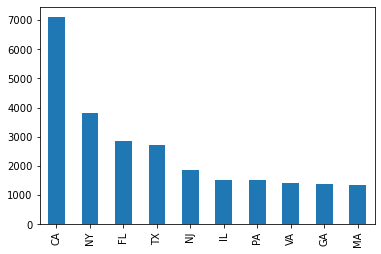

In [24]:
# Univariate analysis
# Distribution of loans across states - Top 10 only
# We see the maximum loans were taken in California followed by Newyork, Florida, Texas and so on
cust_loan_data.addr_state.value_counts()[0:10].plot.bar()
plt.show()

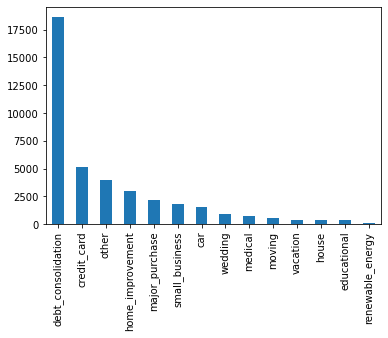

In [25]:
# Lets see the pupose of these loans in terms of number of loans
cust_loan_data.purpose.value_counts().plot.bar()
plt.show()
# Debt consolidation is the number 1 purpose followed by Credit card payment
# Educational loan unfortunately figures as one of the last reasons might indicate only self sufficient
# are able / willing to pursue education and there is lack of interest to pursue a loan to pursue it

In [26]:
cust_loan_data.annual_inc.quantile([0.75,0.85,0.95,1.0])

0.75      82300.0
0.85     100000.0
0.95     142000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

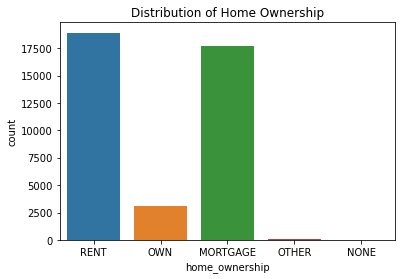

In [27]:
sns.countplot(x='home_ownership', data=cust_loan_data)
plt.title('Distribution of Home Ownership')
plt.show()


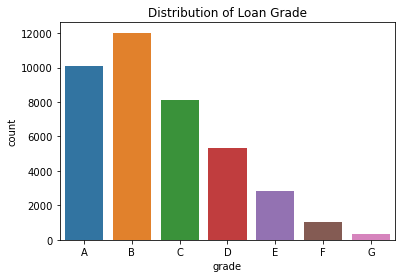

In [28]:
sns.countplot(x='grade', data=cust_loan_data, order=sorted(cust_loan_data['grade'].unique()))
plt.title('Distribution of Loan Grade')
plt.show()


In [29]:
# Remove Outliers with quantile .95 from Annual Income
cust_loan_annu_inc = cust_loan_data[cust_loan_data["annual_inc"] <= cust_loan_data["annual_inc"].quantile(0.95)]

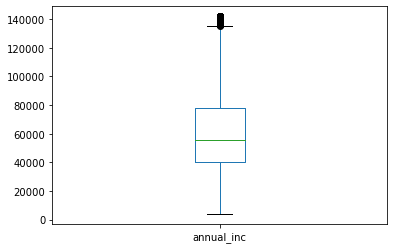

In [30]:
cust_loan_annu_inc.annual_inc.plot.box()
plt.show()
# Most of the people who have availed loan are in the annual income range of 40 k to 80 k

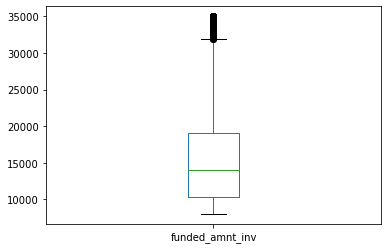

In [31]:
cust_loan_data.funded_amnt_inv.value_counts()

cust_funded_amnt_inv = cust_loan_data[cust_loan_data["funded_amnt_inv"] < 13000]
cust_funded_amnt_inv = cust_loan_data[cust_loan_data["funded_amnt_inv"] > 8000]
cust_funded_amnt_inv.funded_amnt_inv.plot.box()
plt.show()
# Most of the loans that have been funded are in the range of 10 k to 20 k

In [32]:
cust_loan_data.emp_length=cust_loan_data.emp_length.apply(lambda x : x.replace("nan", '0'))
cust_loan_data.emp_length.value_counts()
cust_loan_data['emp_length'] = cust_loan_data['emp_length'].astype(int)


In [33]:
cust_loan_data.dtypes

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                              object
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             int32
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
zip_code                              object
addr_state                            object
dti                                  float64
earliest_cr_line              datetime64[ns]
inq_last_6mths                         int64
open_acc                               int64
revol_bal 

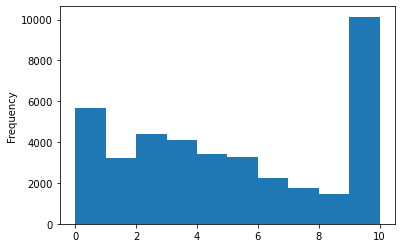

In [34]:
cust_loan_data.emp_length.plot.hist()
plt.show()
# Employees with more than 10 years of experience are the biggest availers of loan.
# The second buggest group is people with < 1 years of exprience.

In [35]:
# Lets look at home is the spread of loan in terms of fully paid, in progress and defaulted so far
cust_loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

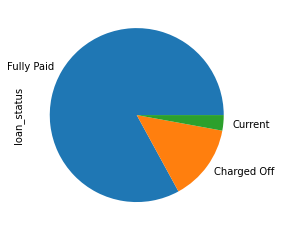

In [36]:
# As there are only 3 different categories a pie chart is apt for representation
cust_loan_data.loan_status.value_counts().plot.pie()
plt.show()
# Thankfully most of the loans are already paid, unfortunately a good percentage are defaultes and a small portion is in progress

In [37]:
# Lets get a sense of how many loans were verified and other categories available, 
cust_loan_data.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

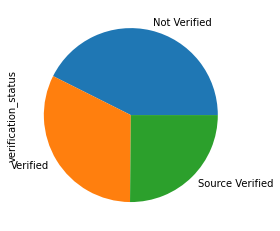

In [38]:
# As there are only 3 categories, Pie chart will be a good representation to get an idea of proportion
cust_loan_data.verification_status.value_counts().plot.pie()

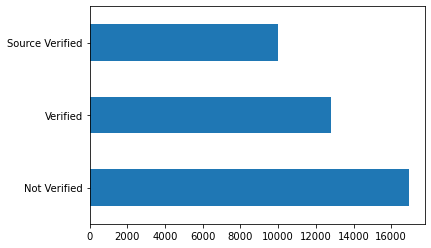

In [39]:
#As we do not get a good picture of the proportion lets see if we can good represenation by a bar chart.
cust_loan_data.verification_status.value_counts().plot.barh()
#This gives a good represenation that the loans which were not verified are higher than the other categories.

In [40]:
#BiVariate Analysis

In [41]:
#Lets look at the relantionshop between amount funded and interest rates

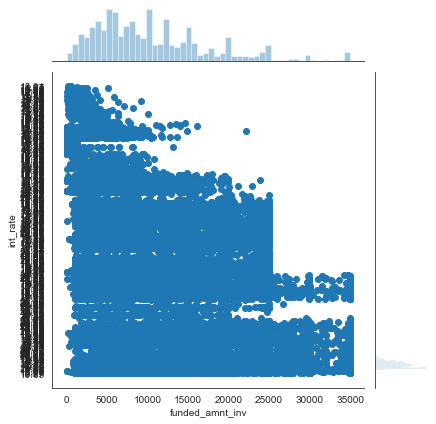

In [42]:
sns.set_style("white")
sns.jointplot(x = cust_loan_data.funded_amnt_inv, y = cust_loan_data.int_rate)
plt.show()
# Not very pleasing on the Y axis in terms of reading the coordinates but we can draw some conclusions
# lower amounts are funded at a higher rate of interest and seem to recede gradually as we approach the 25 k mark
# Any loan given after 25 k, there is a sharp decrease in interest rates


In [43]:
cust_loan_data.term.value_counts()

 36    29096
 60    10621
Name: term, dtype: int64

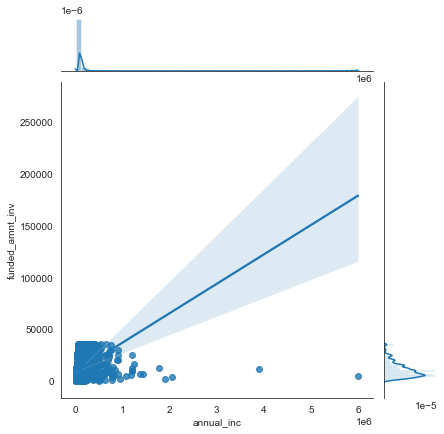

In [44]:
sns.set_style("white")
sns.jointplot(x = cust_loan_data.annual_inc, y = cust_loan_data.funded_amnt_inv, kind="reg")
plt.show()
# Does not seem to be a strong corelation between annual income and the funded amount
# though the regression seems to suggest that there should be a relationship between higher annual incomes and the amoutn funded.

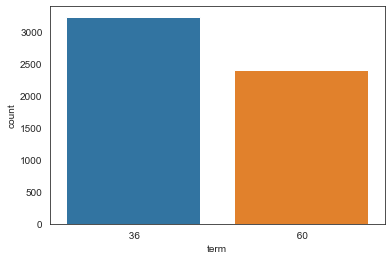

In [45]:
# Lets look at which term loans are the most defaulted
# Looks like loans offered at 36 months are most defaulted though there is not much difference between them in the bigger scheme of things

sns.set_style("white")
sns.countplot(x='term', data=cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.show()

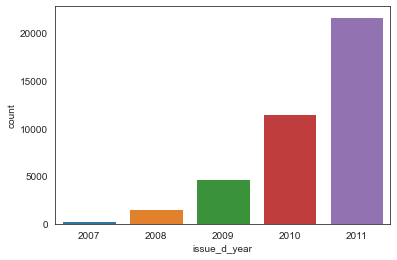

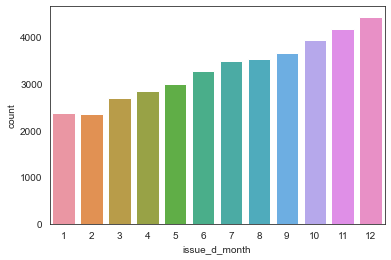

In [46]:
# Lets look at which year loans are the most defaulted
# Looks like loans defaults are rising year on year
# and loan offered in 2011 are the most defaulted 

sns.set_style("white")
sns.countplot(x=cust_loan_data.issue_d_year, data=cust_loan_data[cust_loan_data.loan_status=="Charged Off"])
plt.show()

#Similarly if we look at months where the defaults have occured most
sns.set_style("white")
sns.countplot(x=cust_loan_data.issue_d_month, data=cust_loan_data[cust_loan_data.loan_status=="Charged Off"])
plt.show()
#Loans taken during the month of December are the most that are likely to be defaulted.


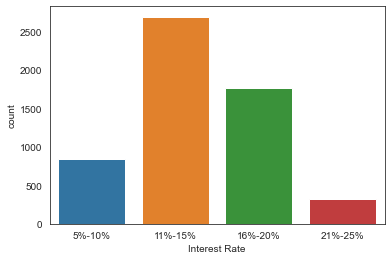

In [47]:
# Lets find out what was the interest rate of loans that defaulted
cust_loan_data['int_rate'] = cust_loan_data['int_rate'].apply(pd.to_numeric)
cust_loan_data['int_rate_bins'] = pd.cut(cust_loan_data['int_rate'], bins=4, precision=0, labels=['5%-10%','11%-15%','16%-20%','21%-25%'])
sns.countplot(x='int_rate_bins', data=cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()
# Looks like the loans that were offered in the interest rate of 11-15 % have defaulted the most

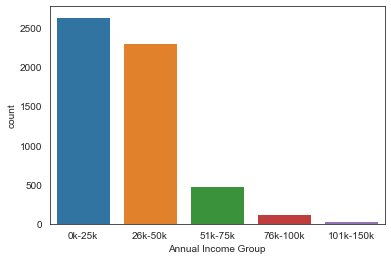

In [48]:
cust_loan_data['annual_inc'] = cust_loan_data['annual_inc'].apply(pd.to_numeric)
cust_loan_data = cust_loan_data[cust_loan_data["annual_inc"] < cust_loan_data["annual_inc"].quantile(0.99)]
cust_loan_data['annual_inc_bins'] = pd.cut(cust_loan_data['annual_inc'], bins=5, precision=0, labels =['0k-25k','26k-50k','51k-75k','76k-100k','101k-150k'])
sns.countplot(x='annual_inc_bins', data=cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.xlabel('Annual Income Group')
plt.show()
# Looks like customers with annual income of 26-50 k have defaulted the most

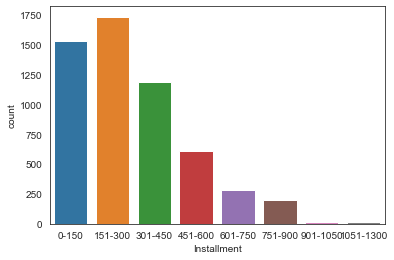

In [49]:
cust_loan_data['installment'] = cust_loan_data['installment'].apply(pd.to_numeric)
cust_loan_data['installment_bins'] = pd.cut(cust_loan_data['installment'], bins=8, precision=0, labels=['0-150','151-300','301-450','451-600', '601-750', '751-900', '901-1050', '1051-1300'])
sns.countplot(x='installment_bins', data = cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.xlabel('Installment')
plt.show()
# Looks like installments in the range of 151-300are the most defaulted

Text(0.5, 0, 'Verification Status')

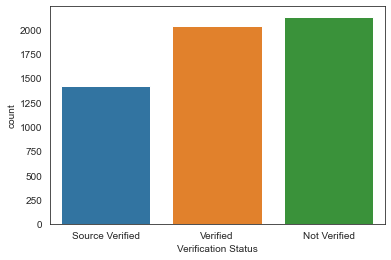

In [50]:
#Lets look at how what bearing verification status has on the loan default
sns.countplot(x='verification_status', data=cust_loan_data[cust_loan_data.loan_status == 'Charged Off'])
plt.xlabel('Verification Status')
# As expected the loans that were not verified are the largest that have defaulted but not much difference between the verified which might
# hint the current verification methods might be inadequate and needs a relook

In [51]:
# Likewise there can be analysis done on other variables like installments, DTI and so on for defaults
# Similarly we can get a +ve analysis on who have paid up by changind the loan status in the above graphs.

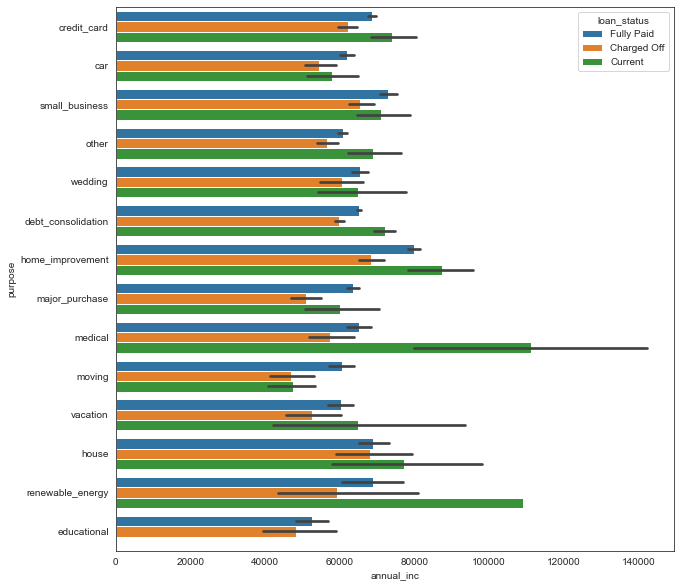

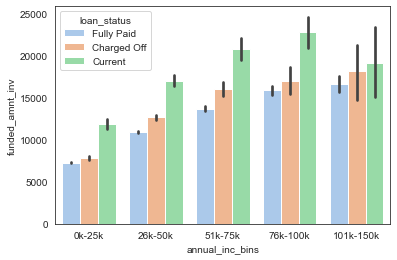

In [52]:
# Let us try to do some relationship between two variable together and the different loan ststus

# Annual Income and Loan Purpose
plt.figure(figsize=(10,10))
sns.barplot(data = cust_loan_data, x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

sns.barplot(data = cust_loan_data, x='annual_inc_bins', y='funded_amnt_inv', hue ='loan_status', palette="pastel")
plt.show()

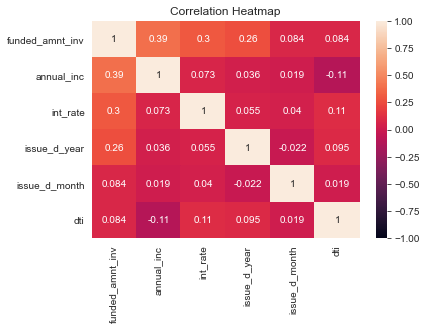

In [53]:
#based on analysis above and factors found to be affecting undertake multivariate analysis
# plot heat map to see correlation between features
columns_of_interest = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "issue_d_year", "issue_d_month", "dti"]
loan_corr = cust_loan_data[columns_of_interest].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True)
plt.title("Correlation Heatmap")
plt.show()

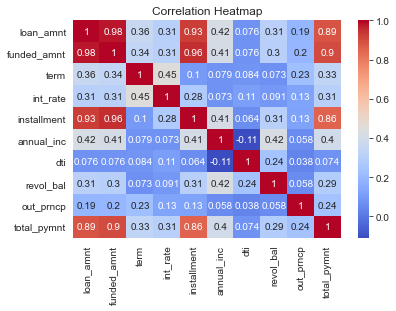

In [54]:
cust_loan_data.term = cust_loan_data.term.apply(lambda x : int(x))
df_numeric = cust_loan_data.select_dtypes(include=['number'])

corr_matrix = df_numeric[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'out_prncp', 'total_pymnt']].corr()
sns.heatmap(corr_matrix , annot = True , cmap= 'coolwarm')
plt.title('Correlation Heatmap') 
plt.show()

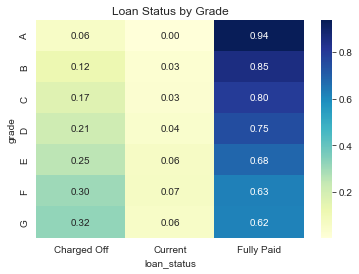

In [55]:
crosstab = pd.crosstab(cust_loan_data['grade'], cust_loan_data['loan_status'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Loan Status by Grade')
plt.show()